In [1]:
!pip install graphviz

In [5]:
import json
from graphviz import Digraph
from IPython.display import display

In [21]:
def visualize_dfa(dfa):
    dot = Digraph()

    # Add states
    for state in dfa['states']:
        if state in dfa['accept_states']:
            dot.node(state, state, shape='doublecircle')  # Accept state as double circle
        else:
            dot.node(state, state, shape='circle')  # Non-accept state as single circle

    # Add edges (transitions)
    for state, transitions in dfa['transitions'].items():
        for input_symbol, next_state in transitions.items():
            dot.edge(state, next_state, label=input_symbol)

    # Display the graph directly in the notebook
    display(dot)

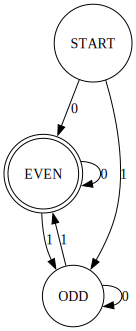

In [ ]:
# Function to load DFA from a JSON file
def load_dfa_from_file(file_path):
    with open(file_path, 'r') as file:
        dfa = json.load(file)
    return dfa


def simulate_dfa(dfa, input_string):
    current_state = dfa['start_state']
    path = []  # Store the path taken

    # Process each symbol in the input string
    for symbol in input_string:
        if symbol not in dfa['alphabet']:
            return "Invalid input symbol!", path
        next_state = dfa['transitions'][current_state][symbol]
        path.append((current_state, next_state))  # Record the transition
        current_state = next_state

    # Determine output message based on the final state
    if current_state in dfa['accept_states']:
        result = "The input string is accepted by the DFA."  # Accepted case
    else:
        result = "The input string is rejected by the DFA."  # Rejected case

    return result, path


In [30]:
def visualize_dfa_from_input(dfa, path=None):
    dot = Digraph()

    # Add states
    for state in dfa['states']:
        if state in dfa['accept_states']:
            dot.node(state, state, shape='doublecircle')  # Accept state as double circle
        else:
            dot.node(state, state, shape='circle')  # Non-accept state as single circle

    # Add edges (transitions)
    for state, transitions in dfa['transitions'].items():
        for input_symbol, next_state in transitions.items():
            if path and (state, next_state) in path:
                dot.edge(state, next_state, label=input_symbol, color='red')  # Highlight path in red
            else:
                dot.edge(state, next_state, label=input_symbol)

    # Display the graph directly in the notebook
    display(dot)

Input: 000 -> The input string represents an even binary number.


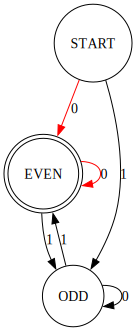

In [31]:
# user input and visualization
def user_input_and_visualization(dfa):
    input_string = input("Enter a binary string: ")  # Example input from the user
    result, path = simulate_dfa(dfa, input_string)
    print(f"Input: {input_string} -> {result}")

    # Visualize the DFA with the path taken for the input string
    visualize_dfa_from_input(dfa, path)

# Call the user input and visualization block
user_input_and_visualization(dfa)